In [1]:
import random
import numpy as np
import pandas as pd
import pathlib
from astropy.table import Table
import argparse
from fits_utils import BPT_diagnostic
import matplotlib.pyplot as plt
from download_utils import *
from fits_utils import *
import seaborn as sns
from utils import get_OH_bins_and_labels, get_index_to_name, get_BPT_bins_and_labels
from utils import *
from vis_fns import *
from plotting import plot_training_curve
from matplotlib.colors import ListedColormap, BoundaryNorm



data_dir = pathlib.Path('/gscratch/scrubbed/mmckay18/DATA/')

# Training and Validation Plot

130


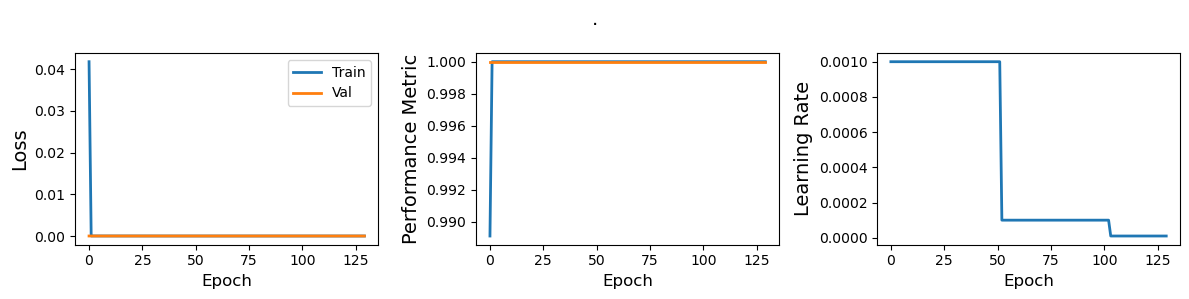

In [2]:
# import pathlib

# load in trained weights
# arch_type='ssftt'
# model_name = 'BPT'

# results_dir = pathlib.Path('/gscratch/astro/mmckay18/DATA/weights/')
# model_weights_dir = results_dir / arch_type / model_name

model_weights_dir = pathlib.Path('/gscratch/astro/mmckay18/DATA/weights/ssftt/BPT/easy/BPT_easy/')
plot_training_curve(model_weights_dir, log=False, results_dir='/gscratch/astro/mmckay18/DATA/weights/ssftt/BPT/easy/BPT_easy/')

# Confusion Matrix

# Maps

In [7]:
get_BPT_bins_and_labels('BPT')

([1.0, 2.0, 3.0], ['SF', 'COMP', 'AGN', 'None'])

In [8]:
get_OH_bins_and_labels('BPT')

([1.0, 2.0, 3.0], ['SF', 'COMP', 'AGN', 'None'])

In [4]:
def create_OH_map(label_path, OH_key='default', use_int_labels=True, 
                  task='classification',regression_norm='scaledmax'):
    OH_bins, _ = get_OH_bins_and_labels(OH_key)
    input = np.load(label_path, allow_pickle=True)
    input = np.ma.masked_array(input, mask=(input == 0), fill_value=0)
    if use_int_labels:
        output = np.digitize(input, bins=OH_bins)
        output = np.ma.array(output, mask=input.mask)
    else:
        output = input
    return output

In [8]:
output = create_OH_map()

TypeError: create_OH_map() missing 1 required positional argument: 'label_path'

In [30]:
train_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/train_fits.csv')
train_df

,/gscratch/scrubbed/mmckay18/DATA/raw/9892/12703/manga-9892-12703-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz
0,/gscratch/scrubbed/mmckay18/DATA/raw/9029/1270...
1,/gscratch/scrubbed/mmckay18/DATA/raw/11954/127...
2,/gscratch/scrubbed/mmckay18/DATA/raw/9027/1270...
3,/gscratch/scrubbed/mmckay18/DATA/raw/8455/1270...
4,/gscratch/scrubbed/mmckay18/DATA/raw/8589/1270...
...,...
66,/gscratch/scrubbed/mmckay18/DATA/raw/8260/9101...
67,/gscratch/scrubbed/mmckay18/DATA/raw/9484/9101...
68,/gscratch/scrubbed/mmckay18/DATA/raw/12678/910...
69,/gscratch/scrubbed/mmckay18/DATA/raw/8717/9101...


In [38]:
# train_df = train_df.sample(10)
# for fits_file in train_df['/gscratch/scrubbed/mmckay18/DATA/raw/9892/12703/manga-9892-12703-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz'].loc[:10] :
#     fits_filepath = pathlib.Path(fits_file)
#     cube_path = get_cube_path(str(fits_filepath), label_task='BPT')
#     label_path = get_label_path_from_cube(cube_path, label_task='BPT')

# #     label_path = get_label_path_from_cube(fits_filepath, label_task='BPT')
#     print(label_path)
#     output = create_OH_map(label_path=label_path, OH_key='BPT', use_int_labels=True, 
#                   task='classification',regression_norm='scaledmax')
    
#     plt.imshow(output)   

In [53]:
# train_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/train_fits.csv')
# # train_df

# # Sample 10 files from the DataFrame
# train_df = train_df.sample(10)

# # Initialize the figure and axis array for the subplots
# fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Loop through the selected fits files
# for idx, fits_file in enumerate(train_df['/gscratch/scrubbed/mmckay18/DATA/raw/9892/12703/manga-9892-12703-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz']):
#     if idx >= 10:  # We only have 10 subplots (2x5)
#         break
    
#     fits_filepath = pathlib.Path(fits_file)
#     cube_path = get_cube_path(str(fits_filepath), label_task='BPT')
#     label_path = get_label_path_from_cube(cube_path, label_task='BPT')

#     print(label_path)
#     output = create_OH_map(label_path=label_path, OH_key='BPT', use_int_labels=True, 
#                   task='classification', regression_norm='scaledmax')
    
#     # Plot the output in the current subplot
#     im = axes[idx].imshow(output, aspect='auto', origin='lower')
#     axes[idx].axis('on')

# plt.tight_layout()
# plt.savefig('/gscratch/scrubbed/mmckay18/result_figs/label_random_subplot.pdf', dpi=300)
# plt.show()

In [24]:
# split_data = 'test'

# train_df = pd.read_csv(f'/gscratch/scrubbed/mmckay18/DATA/splits/BPT/{split_data}_fits.csv')
# print(len(train_df))
# # Sample 10 files from the DataFrame
# train_df = train_df.sample(7)

# # Initialize the figure and axis array for the subplots
# fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Define the colormap and normalization
# colors = ['blue', 'green', 'red']
# cmap = ListedColormap(colors)
# bounds = [0, 1.5, 3, 4.5]
# norm = BoundaryNorm(bounds, cmap.N)

# # Loop through the selected fits files
# for idx, fits_file in enumerate(train_df.iloc[:, 0]):
#     if idx >= 10:  # We only have 10 subplots (2x5)
#         break
    
#     fits_filepath = pathlib.Path(fits_file)
#     cube_path = get_cube_path(str(fits_filepath), label_task='BPT')
#     label_path = get_label_path_from_cube(cube_path, label_task='BPT')

# #     print(label_path)
#     output = create_OH_map(label_path=label_path, OH_key='BPT', use_int_labels=True, 
#                   task='classification', regression_norm='scaledmax')
    
#     # Plot the output in the current subplot
#     im = axes[idx].imshow(output, cmap=cmap, norm=norm, origin='lower')
#     axes[idx].tick_params(labelsize=14)  # Set tick label font size
#     axes[idx].axis('on')

# # Add a single colorbar to the right of the subplots
# fig.subplots_adjust(right=0.9)
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
# cbar = fig.colorbar(im, cax=cbar_ax, ticks=[0.75, 2.25, 3.75])
# cbar.ax.set_yticklabels(['HII', 'Composite', 'AGN'])
# cbar.ax.tick_params(labelsize=14)  # Set colorbar tick label font size
# plt.savefig(f'/gscratch/astro/mmckay18/FIGURES/{split_data}_BPT_label_maps.pdf', dpi=300)
# plt.show()

17


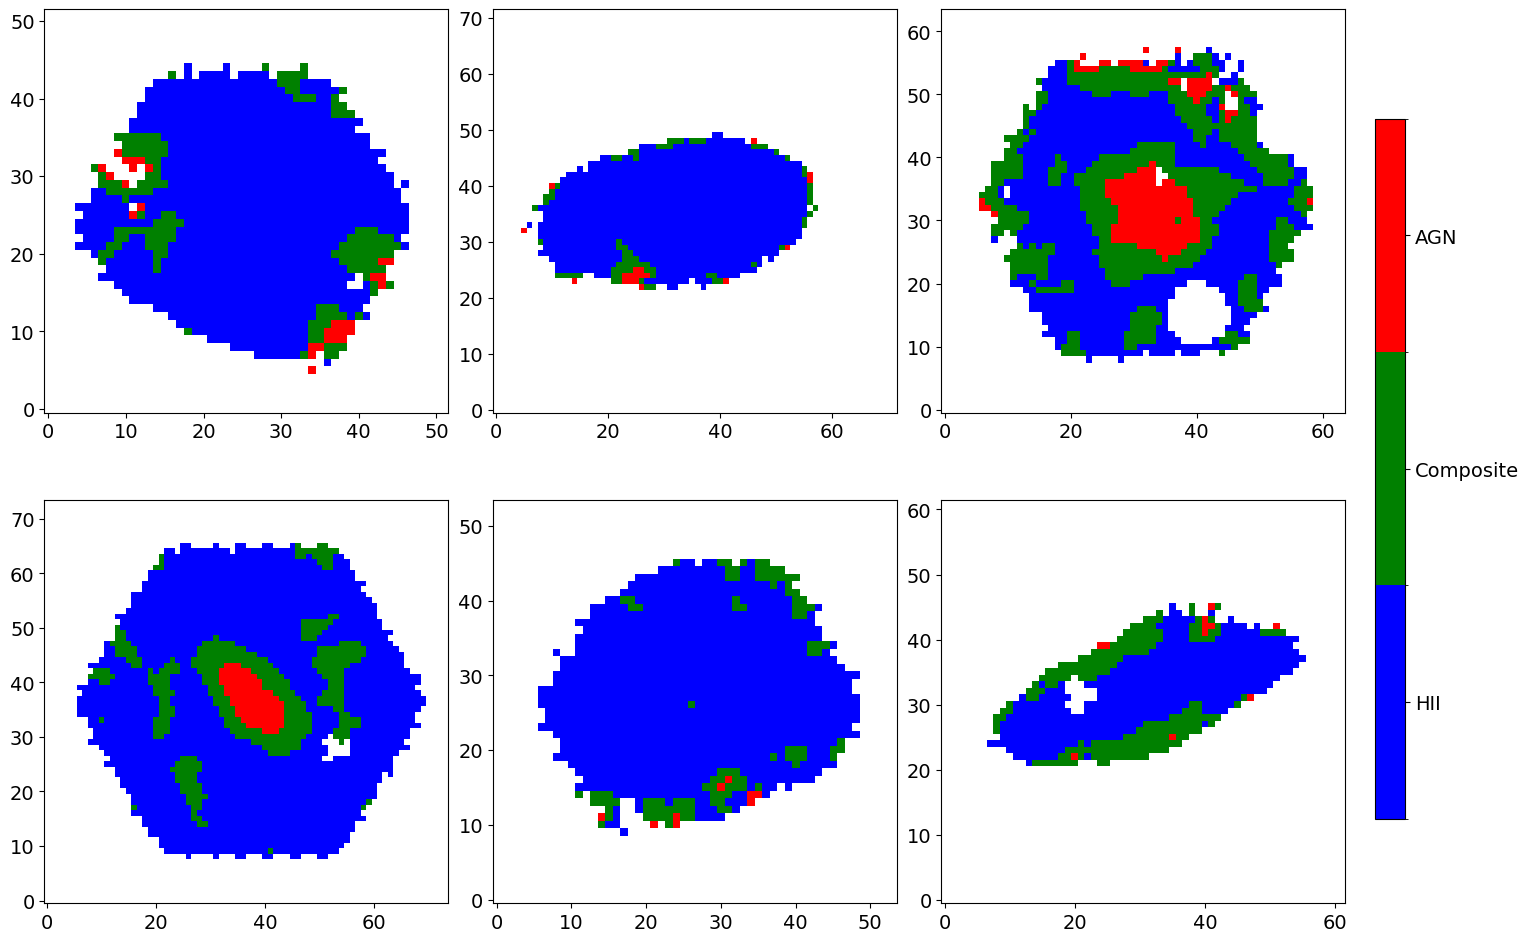

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import pathlib
import math

# Assuming the following functions are defined elsewhere:
# get_cube_path, get_label_path_from_cube, create_OH_map

# Parameters
split_data = 'test'
num_samples = 6  # Specify the number of samples
num_rows = 2  # Number of rows for subplots
num_cols = math.ceil(num_samples / num_rows)  # Calculate number of columns based on the number of samples

train_df = pd.read_csv(f'/gscratch/scrubbed/mmckay18/DATA/splits/BPT/{split_data}_fits.csv')
print(len(train_df))
# Sample a number of files from the DataFrame
train_df = train_df.sample(min(num_samples, len(train_df)))

# Initialize the figure and axis array for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten the axes array for easy iteration if multiple rows
axes = axes.flatten()

# Define the colormap and normalization
colors = ['blue', 'green', 'red']
cmap = ListedColormap(colors)
bounds = [0, 1.5, 3, 4.5]
norm = BoundaryNorm(bounds, cmap.N)

# Loop through the selected fits files
for idx, fits_file in enumerate(train_df.iloc[:, 0]):
    if idx >= num_samples:  # Ensure we don't go beyond the number of samples
        break

    fits_filepath = pathlib.Path(fits_file)
    cube_path = get_cube_path(str(fits_filepath), label_task='BPT')
    label_path = get_label_path_from_cube(cube_path, label_task='BPT')

    output = create_OH_map(label_path=label_path, OH_key='BPT', use_int_labels=True, 
                  task='classification', regression_norm='scaledmax')
    
    # Plot the output in the current subplot
    im = axes[idx].imshow(output, cmap=cmap, norm=norm, origin='lower')
    axes[idx].tick_params(labelsize=14)  # Set tick label font size
    axes[idx].axis('on')

# Hide any unused subplots and remove their axes
for idx in range(num_samples, len(axes)):
    fig.delaxes(axes[idx])

# Adjust the layout
fig.tight_layout()

# Add a single colorbar to the right of the subplots
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[0.75, 2.25, 3.75])
cbar.ax.set_yticklabels(['HII', 'Composite', 'AGN'])
cbar.ax.tick_params(labelsize=14)  # Set colorbar tick label font size

plt.savefig(f'/gscratch/astro/mmckay18/FIGURES/{split_data}_BPT_label_maps.pdf', dpi=300)
plt.show()


In [5]:
# from convenience import quick_eval

# quick_eval(
#     arch_type:str='simplenet',
#     model_suff:str='base',
#     split_dir:str='OH_2',
#     OH_key:str='extra',
#     batch_size=1024,
#     device=torch.cuda.current_device(),
#     task='classification',
#     regression_norm='minmax',
#     confidence_flag=False,
#     confidence_file='./tmp.txt',
#     use_local_data=True,
#     base_results_dir=None,
#     save_figure=True
#     )

In [66]:
train_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/train_fits.csv')

# Sample 10 files from the DataFrame
train_df = train_df.sample(10)
list_of_ids = []
for idx, fits_file in enumerate(train_df['/gscratch/scrubbed/mmckay18/DATA/raw/9892/12703/manga-9892-12703-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz']):
    plate_ifu = '-'.join(fits_file.split('/')[-3:-1])
    print(plate_ifu)
    list_of_ids.append(plate_ifu)

12067-12705
11984-6103
8332-9101
10507-12705
8155-6102
8588-12703
11754-6101
7980-6101
12093-12705
10519-12701


In [4]:
import torch
from convenience import quick_eval
torch.device('cpu')

RuntimeError: No CUDA GPUs are available